## Stock Analysis

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [10]:
start = '2016-01-01'
end = '2019-01-01'

market = 'SPY'
symbol1 = 'AAPL'
symbol2 = 'MSFT'
symbol3 = 'GOOGL'
symbol4 = 'AMD'
bench = yf.download(market, start=start, end=end)
stock1 = yf.download(symbol1, start=start, end=end)
stock2 = yf.download(symbol2, start=start, end=end)
stock3 = yf.download(symbol3, start=start, end=end)
stock4 = yf.download(symbol4, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


## Calculate Daily Gains

In [12]:
#Daily gain for the stock
stock1["Gain"]=(stock1["Adj Close"].pct_change())*100
stock2["Gain"]=(stock2["Adj Close"].pct_change())*100
stock3["Gain"]=(stock3["Adj Close"].pct_change())*100
stock4["Gain"]=(stock4["Adj Close"].pct_change())*100

## Calculate the Mean and Variances of Daily Gains

In [5]:
print('Stock '+ symbol1 + ' Mean:', stock1["Gain"].mean())
print('Stock '+ symbol1 + ' Variances:', stock1["Gain"].var())

Stock AAPL Mean: 0.07176158135817967
Stock AAPL Variances: 2.2250628045471705


In [6]:
print('Stock '+ symbol2 + ' Mean:', stock2["Gain"].mean())
print('Stock '+ symbol2 + ' Variances:', stock2["Gain"].var())

Stock MSFT Mean: 0.10088956283594441
Stock MSFT Variances: 2.0235982606879555


In [7]:
print('Stock '+ symbol3 + ' Mean:', stock3["Gain"].mean())
print('Stock '+ symbol3 + ' Variances:', stock3["Gain"].var())

Stock GOOGL Mean: 0.051859192152509635
Stock GOOGL Variances: 1.8881301862081215


In [13]:
print('Stock '+ symbol4 + ' Mean:', stock4["Gain"].mean())
print('Stock '+ symbol4 + ' Variances:', stock4["Gain"].var())

Stock AMD Mean: 0.34459087763186397
Stock AMD Variances: 19.333079510722385


## Highest volatality and draw the histogram distribution of daily returns for all the stock

<Axes: xlabel='Gain', ylabel='Density'>

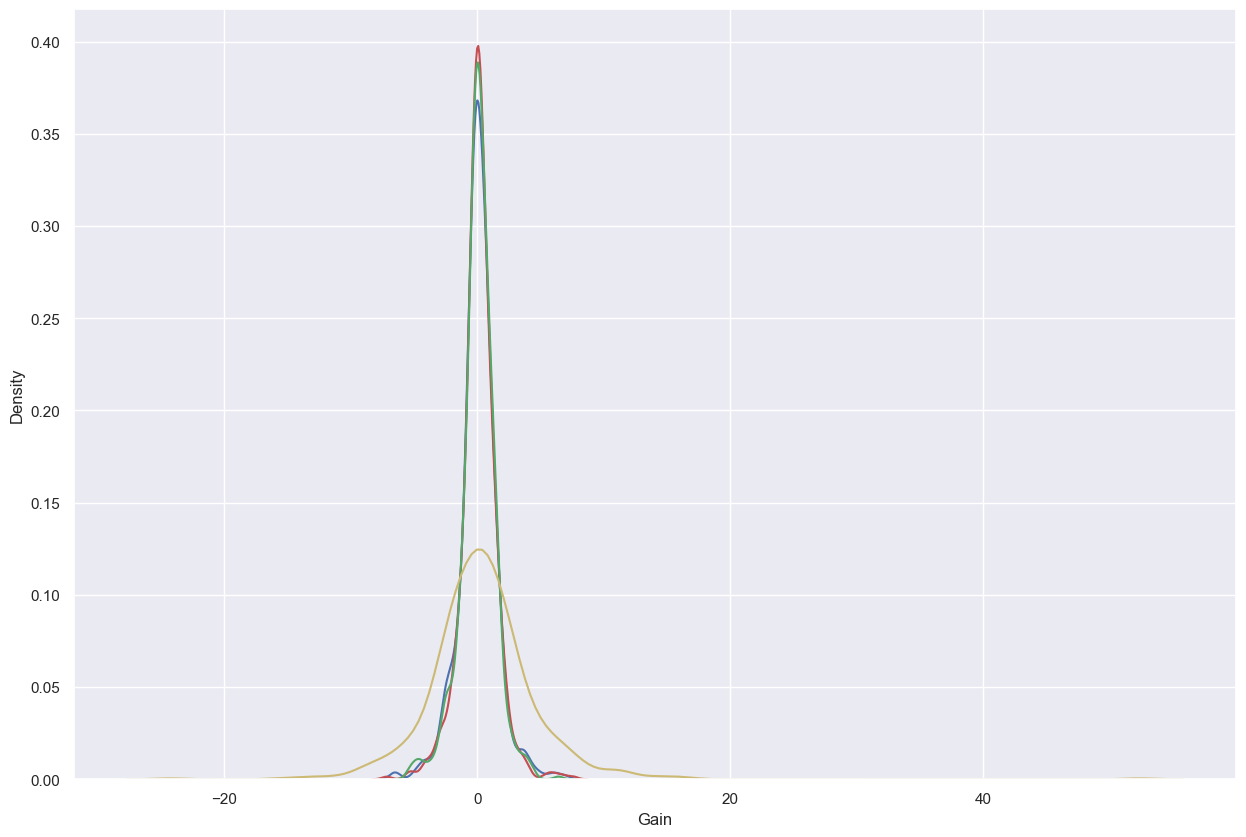

In [14]:
sns.set(rc={"figure.figsize": (15, 10)});
sns.distplot(stock1['Gain'], hist = False, color = 'b' )
sns.distplot(stock2['Gain'], hist = False, color = 'r' )
sns.distplot(stock3['Gain'], hist = False, color = 'g' )
sns.distplot(stock4['Gain'], hist = False, color = 'y' )

## Correlation

In [15]:
All_Stocks = pd.concat([stock1['Gain'],stock2['Gain'],stock3['Gain'],stock4['Gain']], axis=1)

In [16]:
names = ['AAPL', 'MSFT', 'GOOGL', 'AMD']
All_Stocks.columns = names

In [17]:
All_Stocks = All_Stocks.dropna()
All_Stocks

,AAPL,MSFT,GOOGL,AMD
Date,,,,
2016-01-05,-2.505951,0.456227,0.275202,-0.722021
2016-01-06,-1.956949,-1.816551,-0.288894,-8.727273
2016-01-07,-4.220436,-3.478258,-2.413970,-9.163347
2016-01-08,0.528737,0.306726,-1.361667,-6.140345
2016-01-11,1.619222,-0.057363,0.295516,9.345785
...,...,...,...,...
2018-12-24,-2.587398,-4.173894,-0.663805,-1.653873
2018-12-26,7.042160,6.830991,6.416363,7.507508
2018-12-27,-0.648992,0.616561,0.481937,-2.290502


In [18]:
All_Stocks.corr()

,AAPL,MSFT,GOOGL,AMD
AAPL,1.000000,0.587342,0.583721,0.270291
MSFT,0.587342,1.000000,0.751075,0.200653
GOOGL,0.583721,0.751075,1.000000,0.207382
AMD,0.270291,0.200653,0.207382,1.000000


<Axes: >

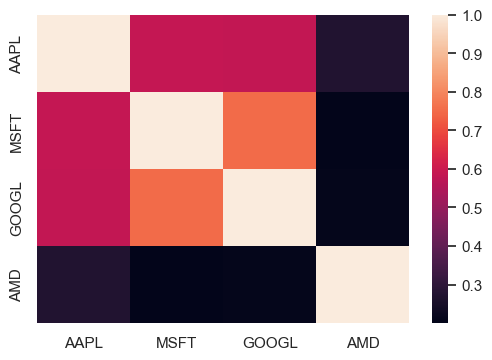

In [19]:
#Heat map
sns.set(rc={"figure.figsize": (6, 4)});
sns.heatmap( All_Stocks.corr())

## Monthly Returns

In [20]:
Stock1_Monthly = stock1.asfreq('M').ffill()
Stock2_Monthly = stock2.asfreq('M').ffill()
Stock3_Monthly = stock3.asfreq('M').ffill()
Stock4_Monthly = stock4.asfreq('M').ffill()

In [21]:
print('Monthly Returns')
print('Stock '+ symbol1 + ' Mean:', Stock1_Monthly["Gain"].mean())
print('Stock '+ symbol1 + ' Variances:', Stock1_Monthly["Gain"].var())

Monthly Returns
Stock AAPL Mean: 0.28626707782825117
Stock AAPL Variances: 0.7227308447025227


In [22]:
print('Monthly Returns')
print('Stock '+ symbol2 + ' Mean:', Stock2_Monthly["Gain"].mean())
print('Stock '+ symbol2 + ' Variances:', Stock2_Monthly["Gain"].var())

Monthly Returns
Stock MSFT Mean: 0.21547207352213985
Stock MSFT Variances: 1.141200922716268


In [23]:
print('Monthly Returns')
print('Stock '+ symbol3 + ' Mean:', Stock3_Monthly["Gain"].mean())
print('Stock '+ symbol3 + ' Variances:', Stock3_Monthly["Gain"].var())

Monthly Returns
Stock GOOGL Mean: -0.13416853432429168
Stock GOOGL Variances: 1.6478767043924087


In [24]:
print('Monthly Returns')
print('Stock '+ symbol4 + ' Mean:', Stock4_Monthly["Gain"].mean())
print('Stock '+ symbol4 + ' Variances:', Stock4_Monthly["Gain"].var())

Monthly Returns
Stock AMD Mean: 0.3264298344188961
Stock AMD Variances: 7.488705232130907


## Monthly Returns with Box Plot

In [25]:
Stock1=np.array(Stock1_Monthly["Gain"])
Stock1= Stock1[~np.isnan(Stock1_Monthly["Gain"])]

Stock2 = np.array(Stock2_Monthly["Gain"])
Stock2=Stock2[~np.isnan(Stock2_Monthly["Gain"])]

Stock3 = np.array(Stock3_Monthly["Gain"])
Stock3=Stock3[~np.isnan(Stock3_Monthly["Gain"])]

Stock4 = np.array(Stock4_Monthly["Gain"])
Stock4=Stock4[~np.isnan(Stock4_Monthly["Gain"])]

AllStocks =[Stock1,Stock2,Stock3,Stock4]

[Text(1, 0, 'AAPL'),
 Text(2, 0, 'MSFT'),
 Text(3, 0, 'GOOGL'),
 Text(4, 0, 'AMD')]

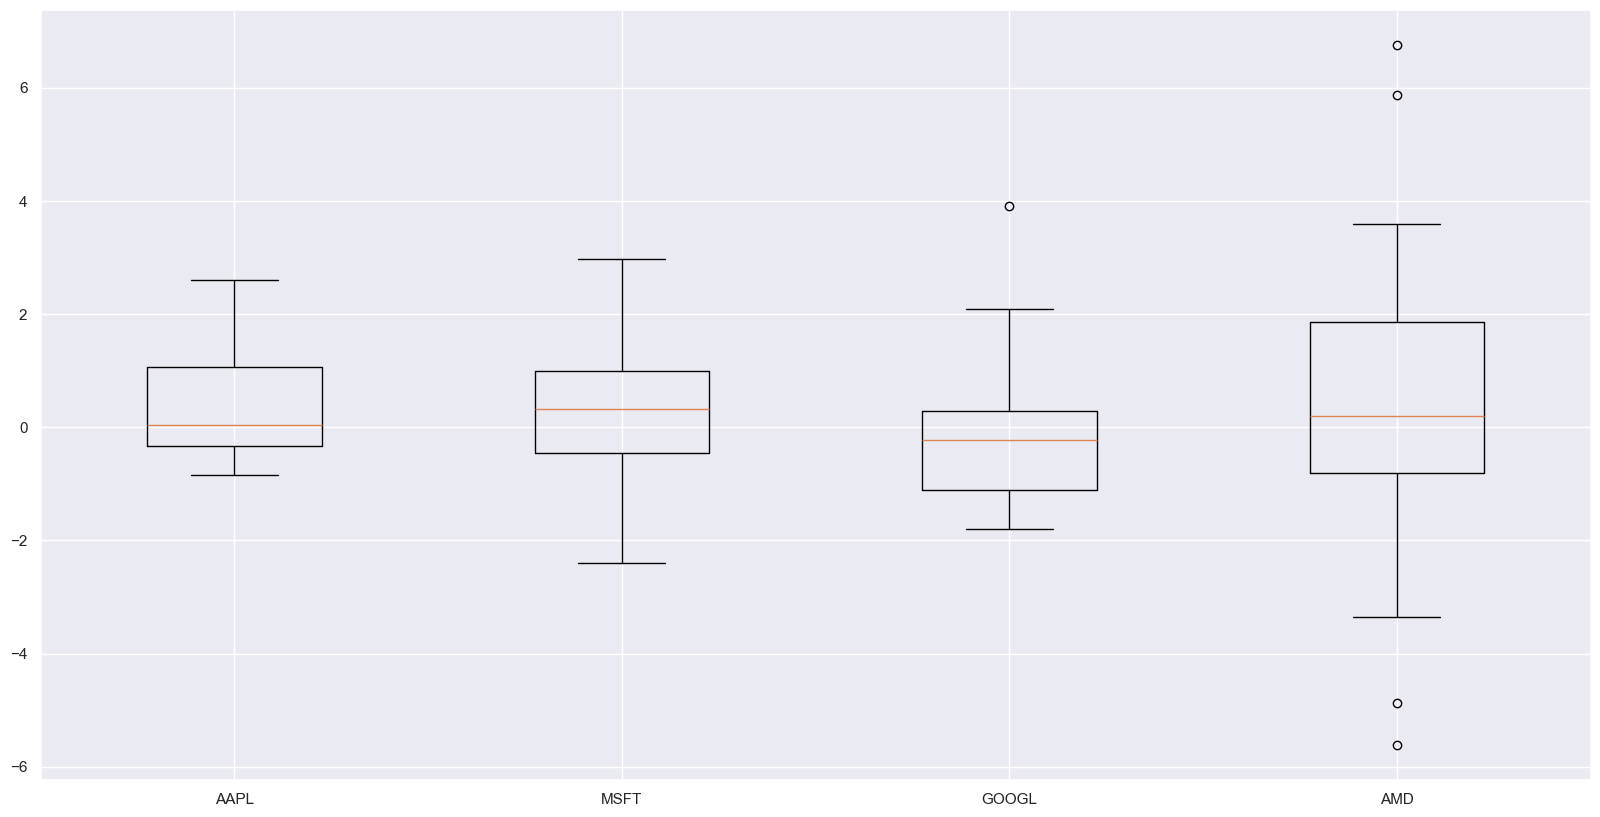

In [26]:
fig = plt.figure(1, figsize=(20, 10))
ax = fig.add_subplot(111)
bp = ax.boxplot(AllStocks)
ax.set_xticklabels([symbol1, symbol2, symbol3, symbol4])

## Stock with highest probability gains with 2% or more

In [27]:
#Probability of Stock1
stock1_p = 1-stats.norm.cdf( 0.02,
             loc=Stock1_Monthly["Gain"].mean(),
             scale=Stock1_Monthly["Gain"].std())

print(symbol1 + " probability of gains:", round(stock1_p, 2))

AAPL probability of gains: 0.62


In [28]:
#Probability of Stock1
stock2_p = 1-stats.norm.cdf( 0.02,
             loc=Stock2_Monthly["Gain"].mean(),
             scale=Stock2_Monthly["Gain"].std())

print(symbol2 + " probability of gains:", round(stock2_p, 2))

MSFT probability of gains: 0.57


In [29]:
#Probability of Stock1
stock3_p = 1-stats.norm.cdf( 0.02,
             loc=Stock3_Monthly["Gain"].mean(),
             scale=Stock3_Monthly["Gain"].std())

print(symbol3 + " probability of gains:", round(stock3_p, 2))

GOOGL probability of gains: 0.45


In [30]:
#Probability of Stock1
stock4_p = 1-stats.norm.cdf( 0.02,
             loc=Stock4_Monthly["Gain"].mean(),
             scale=Stock4_Monthly["Gain"].std())

print(symbol4 + " probability of gains:", round(stock4_p, 2))

AMD probability of gains: 0.54


## Stock with highest probability of loss with 2% or more

In [31]:
#Probability of Stock1
stock1_l = stats.norm.cdf(-0.02,
             loc=Stock1_Monthly["Gain"].mean(),
             scale=Stock1_Monthly["Gain"].std())

print(symbol1 + " probability of loss:", round(stock1_l, 2))

AAPL probability of loss: 0.36


In [32]:
#Probability of Stock1
stock2_l = stats.norm.cdf(-0.02,
             loc=Stock2_Monthly["Gain"].mean(),
             scale=Stock2_Monthly["Gain"].std())

print(symbol2 + " probability of loss:", round(stock2_l, 2))

MSFT probability of loss: 0.41


In [33]:
#Probability of Stock1
stock3_l = stats.norm.cdf(-0.02,
             loc=Stock3_Monthly["Gain"].mean(),
             scale=Stock3_Monthly["Gain"].std())

print(symbol3 + " probability of loss:", round(stock3_l, 2))

GOOGL probability of loss: 0.54


In [34]:
#Probability of Stock1
stock4_l = stats.norm.cdf(-0.02,
             loc=Stock4_Monthly["Gain"].mean(),
             scale=Stock4_Monthly["Gain"].std())

print(symbol4 + " probability of loss:", round(stock4_l, 2))

AMD probability of loss: 0.45


## Portfolio Analysis

In [35]:
x=np.array([Stock1_Monthly["Gain"].mean(),Stock2_Monthly["Gain"].mean(),Stock3_Monthly["Gain"].mean(),Stock4_Monthly["Gain"].mean()])
print(x)

[ 0.28626708  0.21547207 -0.13416853  0.32642983]


In [36]:
#Weights of the stocks is 0.25 which is added up to 1
weights = np.array([0.25,0.25,0.25,0.25])
exp_val=np.sum(x*weights)

print("Expected Value is ",round(exp_val,4))
print("\n")
#Calculate Covariance matrix
y = np.vstack([Stock1,Stock2,Stock3,Stock4])

cov = np.cov(y)
print("Below is covariance matrix")
print("\n")
print(cov)

Expected Value is  0.1735


Below is covariance matrix


[[0.72273084 0.354543   0.3588042  0.72957462]
 [0.354543   1.14120092 0.84036362 1.49464791]
 [0.3588042  0.84036362 1.6478767  1.22716404]
 [0.72957462 1.49464791 1.22716404 7.48870523]]


In [37]:
#Calcualte the variance of monthly return of portfolio
covar=np.dot(weights.T,np.dot(cov,weights))
print("Variance of portfolio is ",round(covar,4))

Variance of portfolio is  1.3132


In [38]:
#Calculate the probability
1-stats.norm.cdf(0.005,
             loc=exp_val,
             scale=covar)

0.5510503925987134

In [39]:
# Create 25 Iteration of weights
# Generate a random number

number=range(1,26)

In [40]:
# Function to calculate expected value of portfolio and variance
def calculate(weights, meanReturns, covMatrix):
     
     portReturn = np.sum(weights*meanReturns)
     portVar = (np.dot(weights.T, np.dot(covMatrix, weights)))
     return portReturn, portVar

In [41]:
# Generate weights in random that sum to 1 
import random
random.seed(4)
d=[]
for i in number:
    weights = np.random.random(4)
    weights /= weights.sum()
    print("Set of random weight for Iterartion-->",i,"is", weights)
    pret, pvar = calculate(weights, x, cov)
    
    d.append((weights[0],weights[1],weights[2],weights[3],pret,pvar))
    df=pd.DataFrame(d,columns=('Stock1_weight','Stock2_weight','Stock3_weight','Stock4_weight','mean_return','var_return'))
    print("Mean monthly return for iteration-->",i,"is",pret)
    print("Variance of monthly return for iteration-->",i,"is",pvar)
    print("\n")

Set of random weight for Iterartion--> 1 is [0.28344463 0.19371486 0.36218574 0.16065476]
Mean monthly return for iteration--> 1 is 0.12672958636847867
Variance of monthly return for iteration--> 1 is 1.0431476840966045


Set of random weight for Iterartion--> 2 is [0.25960329 0.28426314 0.16777844 0.28835513]
Mean monthly return for iteration--> 2 is 0.20718377444646097
Variance of monthly return for iteration--> 2 is 1.4467263528557401


Set of random weight for Iterartion--> 3 is [0.30790717 0.371832   0.29547779 0.02478304]
Mean monthly return for iteration--> 3 is 0.13670919965771727
Variance of monthly return for iteration--> 3 is 0.7625552568809708


Set of random weight for Iterartion--> 4 is [0.06292081 0.15701587 0.5076304  0.27243291]
Mean monthly return for iteration--> 4 is 0.07266689530224382
Variance of monthly return for iteration--> 4 is 1.667640423122498


Set of random weight for Iterartion--> 5 is [0.21879295 0.32138649 0.33855153 0.12126903]
Mean monthly return for

In [42]:
# Dataframe containing stock weights,mean and variances of all possible portfolios
print(df)

    Stock1_weight  Stock2_weight  Stock3_weight  Stock4_weight  mean_return  \
0        0.283445       0.193715       0.362186       0.160655     0.126730   
1        0.259603       0.284263       0.167778       0.288355     0.207184   
2        0.307907       0.371832       0.295478       0.024783     0.136709   
3        0.062921       0.157016       0.507630       0.272433     0.072667   
4        0.218793       0.321386       0.338552       0.121269     0.126046   
5        0.179707       0.290077       0.312715       0.217500     0.142990   
6        0.234042       0.355646       0.020974       0.389339     0.267908   
7        0.243567       0.236486       0.296652       0.223295     0.153770   
8        0.223681       0.565430       0.078411       0.132478     0.218592   
9        0.313887       0.356148       0.318743       0.011221     0.127493   
10       0.499830       0.446669       0.041318       0.012183     0.237763   
11       0.232554       0.408257       0.139244     

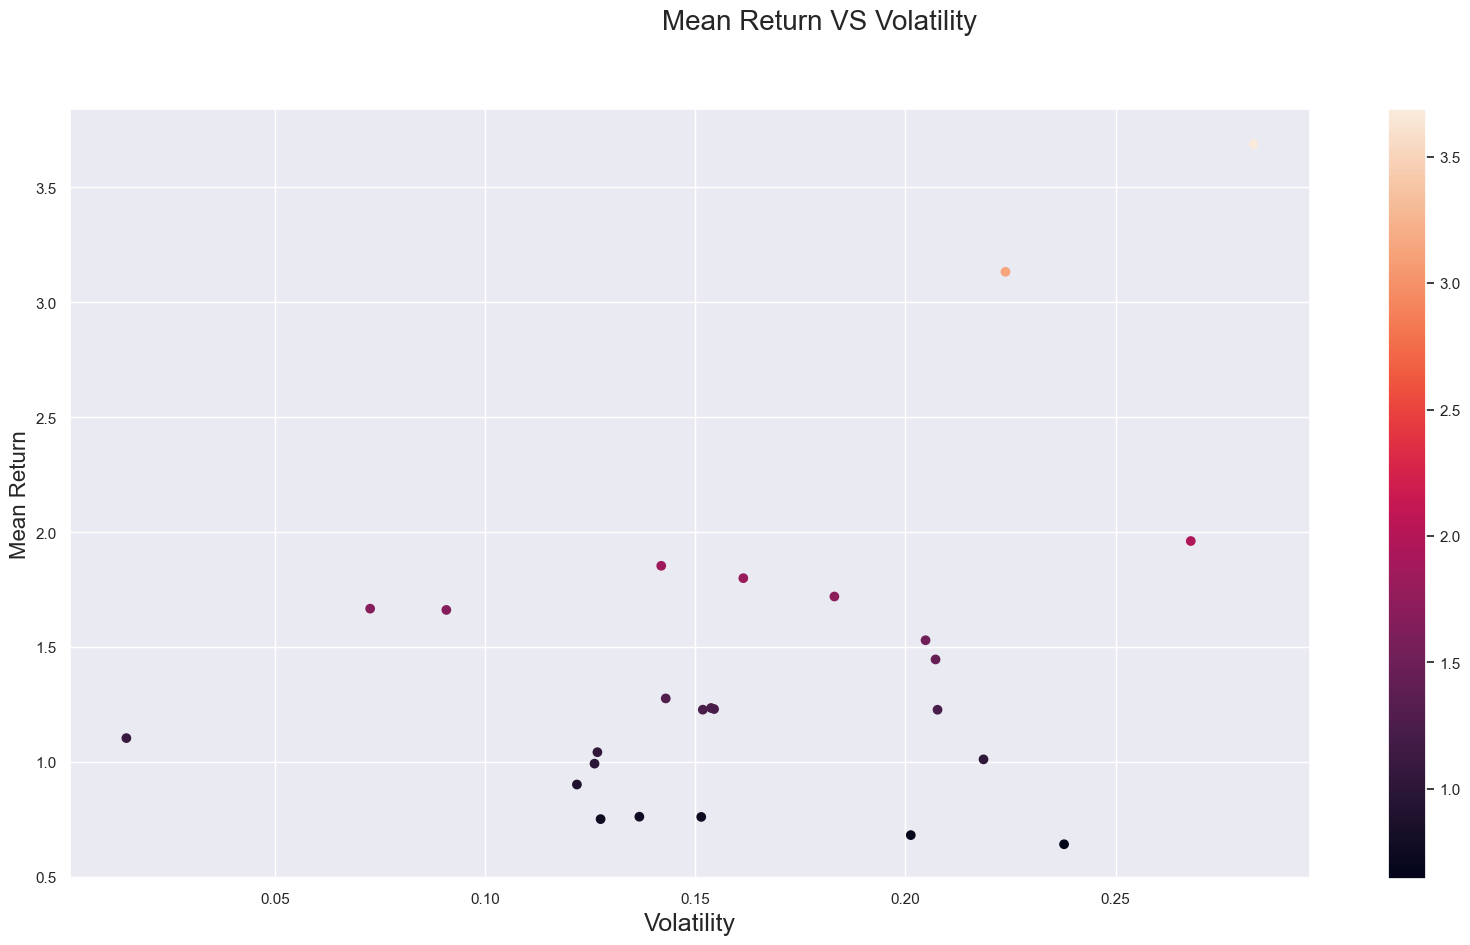

In [43]:
fig = plt.figure(1, figsize=(20, 10))
plt.scatter(df.mean_return,df.var_return, c=df.var_return)
plt.colorbar()
fig.suptitle('Mean Return VS Volatility', fontsize=20)
plt.xlabel('Volatility', fontsize=18)
plt.ylabel('Mean Return', fontsize=16)
plt.show()